## Author : Braham Parkash
## Data Science & Business Analytics Internship
##GRIP - The Spark Foundation
## Task-7 Timeline Analysis_Covid-19

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
!wget --header="Host: covid.ourworldindata.org" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.193 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" "https://covid.ourworldindata.org/data/owid-covid-data.csv" -c -O 'owid-covid-data.csv'

--2020-11-14 10:09:01--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.248.63.231, 192.81.212.192, 2604:a880:400:d0::6d9:d001, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.248.63.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13138568 (13M) [text/csv]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv 100%[===================>]  12.53M  3.30MB/s    in 3.8s    

2020-11-14 10:09:05 (3.28 MB/s) - ‘owid-covid-data.csv’ saved [13138568/13138568]



In [ ]:
covid=pd.read_csv('owid-covid-data.csv')

In [ ]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,18.733,18.733,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,37.465,18.733,2.676,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56537 entries, 0 to 56536
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            56218 non-null  object 
 1   continent                           55899 non-null  object 
 2   location                            56537 non-null  object 
 3   date                                56537 non-null  object 
 4   total_cases                         52901 non-null  float64
 5   new_cases                           55612 non-null  float64
 6   new_cases_smoothed                  54802 non-null  float64
 7   total_deaths                        43595 non-null  float64
 8   new_deaths                          55612 non-null  float64
 9   new_deaths_smoothed                 54802 non-null  float64
 10  total_cases_per_million             52618 non-null  float64
 11  new_cases_per_million               55548

In [ ]:
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.290100e+04,55612.000000,54802.000000,4.359500e+04,55612.000000,54802.000000,52618.000000,55548.000000,54737.000000,43327.000000,55548.000000,54737.000000,37696.000000,4490.000000,4490.000000,5005.000000,5005.000000,357.000000,357.000000,645.000000,645.000000,2.181500e+04,2.158400e+04,21815.000000,21584.000000,2.437700e+04,24377.000000,22568.000000,22977.000000,46612.000000,5.621800e+04,53566.000000,50285.000000,49528.000000,50023.000000,49626.000000,33078.000000,50260.000000,52100.000000,39104.000000,38599.000000,23796.000000,45271.000000,55495.000000,48522.000000
mean,1.622905e+05,1897.966716,1862.886770,6.738682e+03,46.502050,46.227799,3024.974561,38.051600,36.909819,93.590209,0.663035,0.648942,1.044593,726.191982,13.264264,3867.245355,76.562638,249.262364,7.284022,2230.688121,60.655074,2.260944e+06,2.808377e+04,77.545457,0.907242,2.706368e+04,0.889546,183.612341,0.067521,56.937602,8.579257e+07,361.027811,31.201046,9.186235,5.804984,20646.030738,12.412168,252.525070,8.067328,10.747738,32.641518,52.118681,3.091000,73.945133,0.722442
std,1.634413e+06,17630.823342,17112.569358,5.474821e+04,386.132319,372.894985,5952.569677,131.577191,98.007452,178.655599,3.043611,1.937493,0.395932,2031.110506,18.788717,9952.989504,109.079014,545.005400,18.182646,5305.474602,174.848637,1.029612e+07,1.132700e+05,155.380826,1.685835,1.045806e+05,1.559671,880.341109,0.088513,26.058923,6.024963e+08,1641.850840,9.043861,6.299370,4.297537,20321.894111,19.414237,117.484288,4.183577,10.471586,13.451988,31.643242,2.514179,7.396151,0.153245
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,-67.901000,-9.678000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,-3.743000e+03,0.000000,-0.398000,0.000000e+00,0.000000,1.535000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.750000e+02,0.000000,0.857000,1.200000e+01,0.000000,0.000000,88.076000,0.000000,0.252000,3.867000,0.000000,0.000000,0.870000,9.000000,1.683750,38.000000,10.554000,4.027000,0.816000,20.137000,4.167000,5.990050e+04,1.032000e+03,3.963000,0.073000,1.101000e+03,0.074000,10.669750,0.010000,39.810000,1.326539e+06,37.728000,23.200000,3.552000,2.085000,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.023000e+03,14.000000,19.000000,8.300000e+01,0.000000,0.286000,576.852000,2.144500,3.807000,20.117000,0.000000,0.027000,1.040000,48.000000,5.901000,213.000000,35.548000,25.778000,2.083000,146.811000,14.997000,2.605820e+05,3.684000e+03,20.554000,0.340000,3.984000e+03,0.346000,29.675000,0.032000,61.110000,8.278737e+06,88.125000,31.100000,6.933000,4.393000,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.400000,0.752000
75%,2.134300e+04,229.000000,238.429000,7.095000e+02,4.000000,4.000000,3360.393000,25.482000,28.759000,86.714500,0.288000,0.408000,1.220000,293.000000,17.462000,1617.000000,93.386000,233.091000,6.076000

In [ ]:
covid.duplicated().sum()

0

In [ ]:
covid.isna().mean()*100

iso_code                               0.564232
continent                              1.128465
location                               0.000000
date                                   0.000000
total_cases                            6.431187
new_cases                              1.636097
new_cases_smoothed                     3.068787
total_deaths                          22.891204
new_deaths                             1.636097
new_deaths_smoothed                    3.068787
total_cases_per_million                6.931744
new_cases_per_million                  1.749297
new_cases_smoothed_per_million         3.183756
total_deaths_per_million              23.365230
new_deaths_per_million                 1.749297
new_deaths_smoothed_per_million        3.183756
reproduction_rate                     33.325079
icu_patients                          92.058298
icu_patients_per_million              92.058298
hosp_patients                         91.147390
hosp_patients_per_million             91

In [ ]:
covid.shape

(56537, 50)

In [ ]:
#covid.dropna(inplace=True)

In [ ]:
covid.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,18.733,18.733,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,37.465,18.733,2.676,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [ ]:
covid1=covid[['date','total_cases','new_cases','total_deaths','new_deaths','total_tests','new_tests']]

In [ ]:
covid1.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests
0,2020-03-13,2.0,2.0,NaN,0.0,NaN,NaN
1,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-20,4.0,2.0,NaN,0.0,NaN,NaN
3,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
covid1['date']=pd.to_datetime(covid1['date'],infer_datetime_format=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
covid1.set_index('date',inplace = True)

Text(0.5, 0, 'Month')

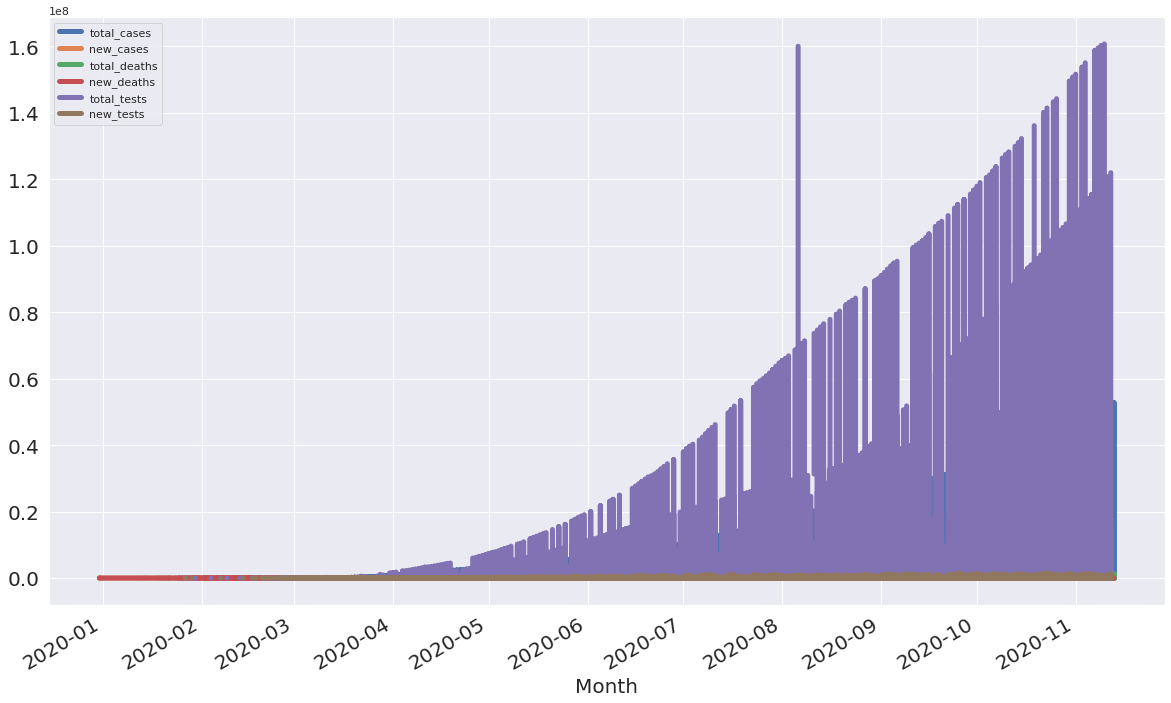

In [ ]:
covid1.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

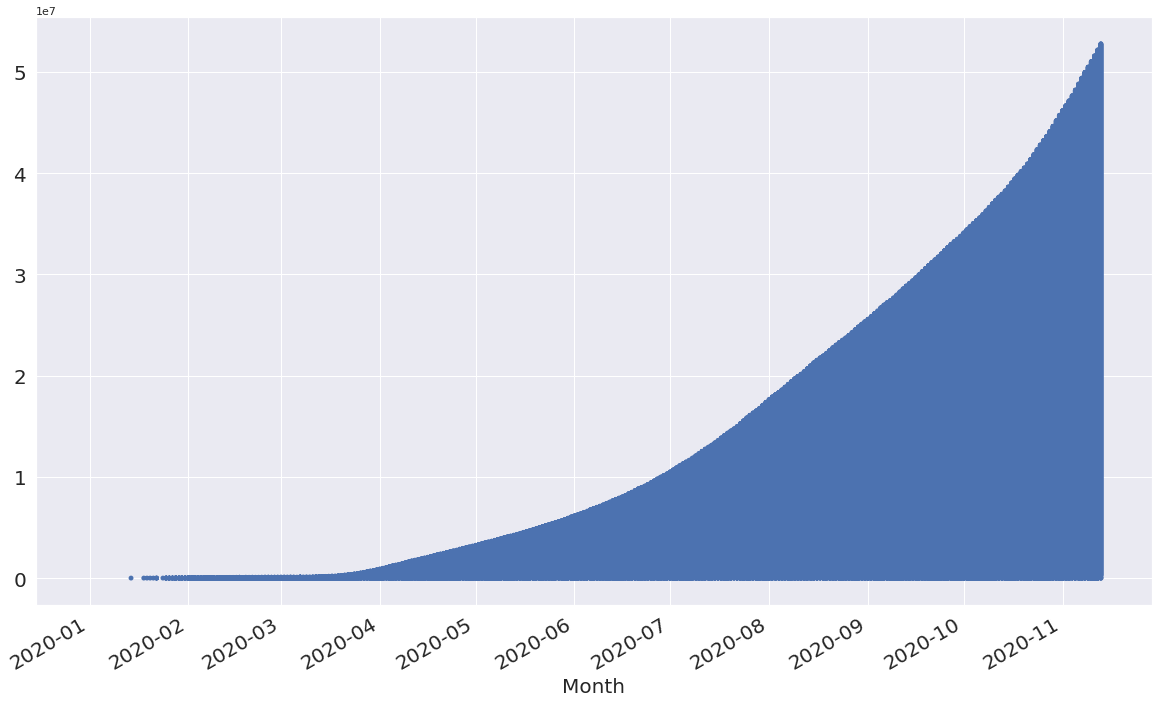

In [ ]:
covid1.total_cases.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

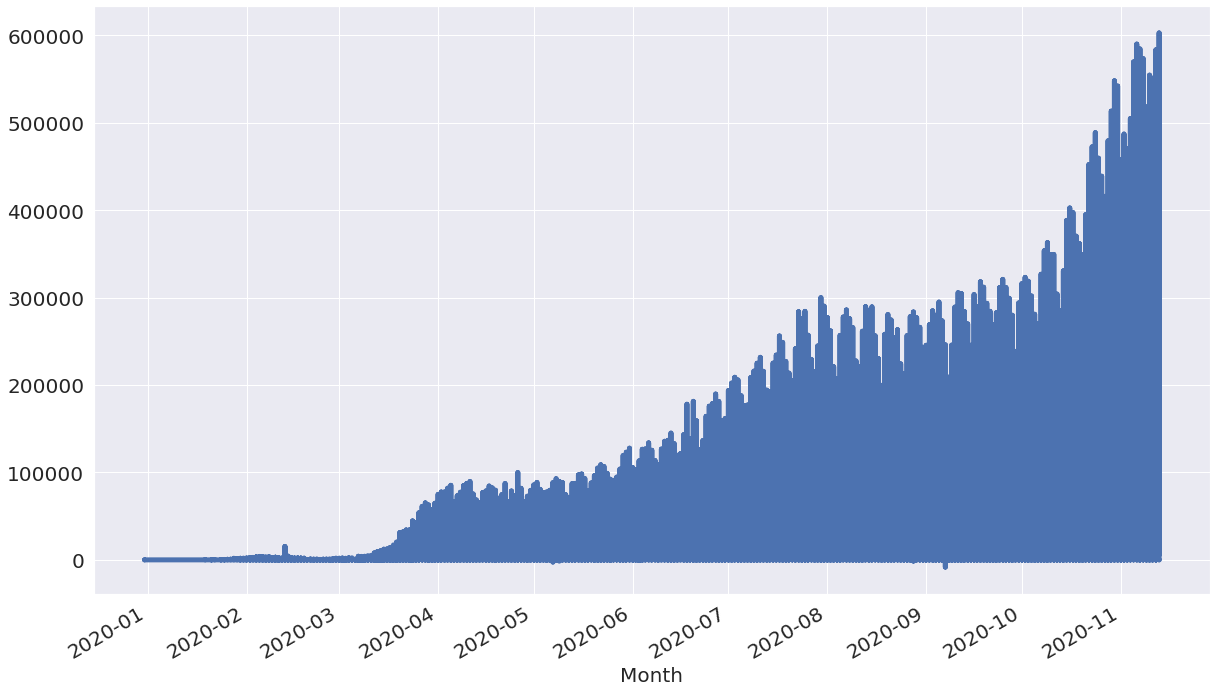

In [ ]:
covid1.new_cases.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

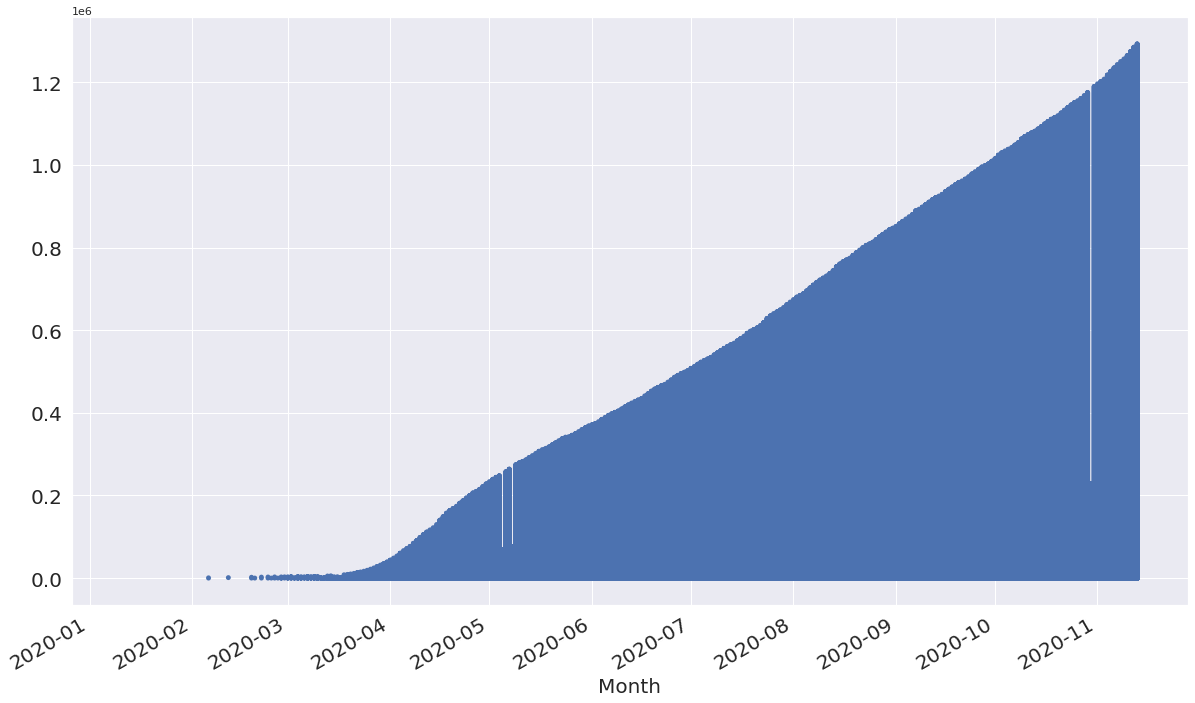

In [ ]:
covid1.total_deaths.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

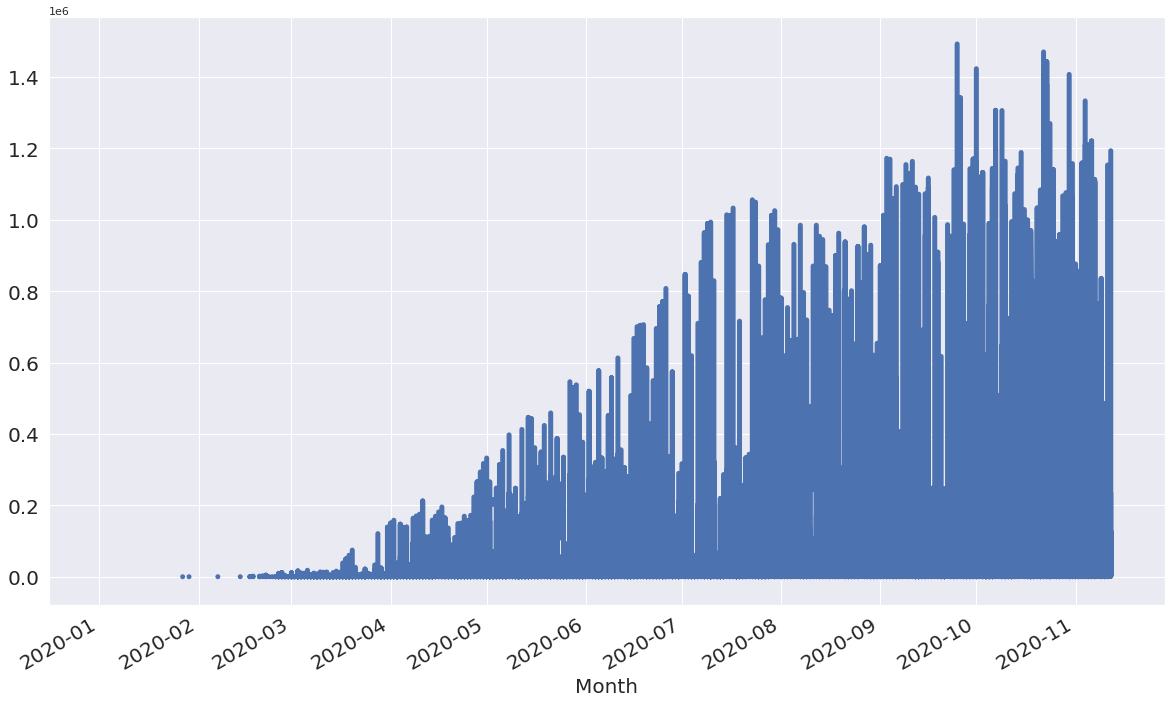

In [ ]:
covid1.new_tests.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

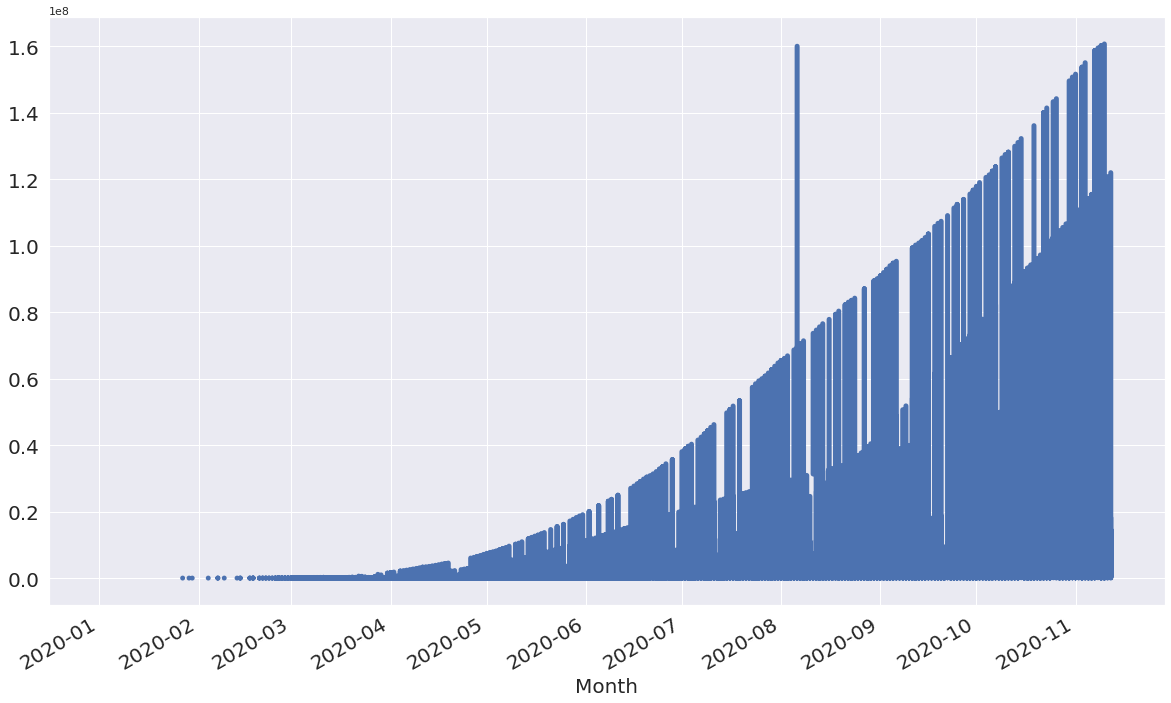

In [ ]:
covid1.total_tests.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize = 20)

##Trends and Seasonality in TimeSeries Data

Text(0.5, 0, 'Month')

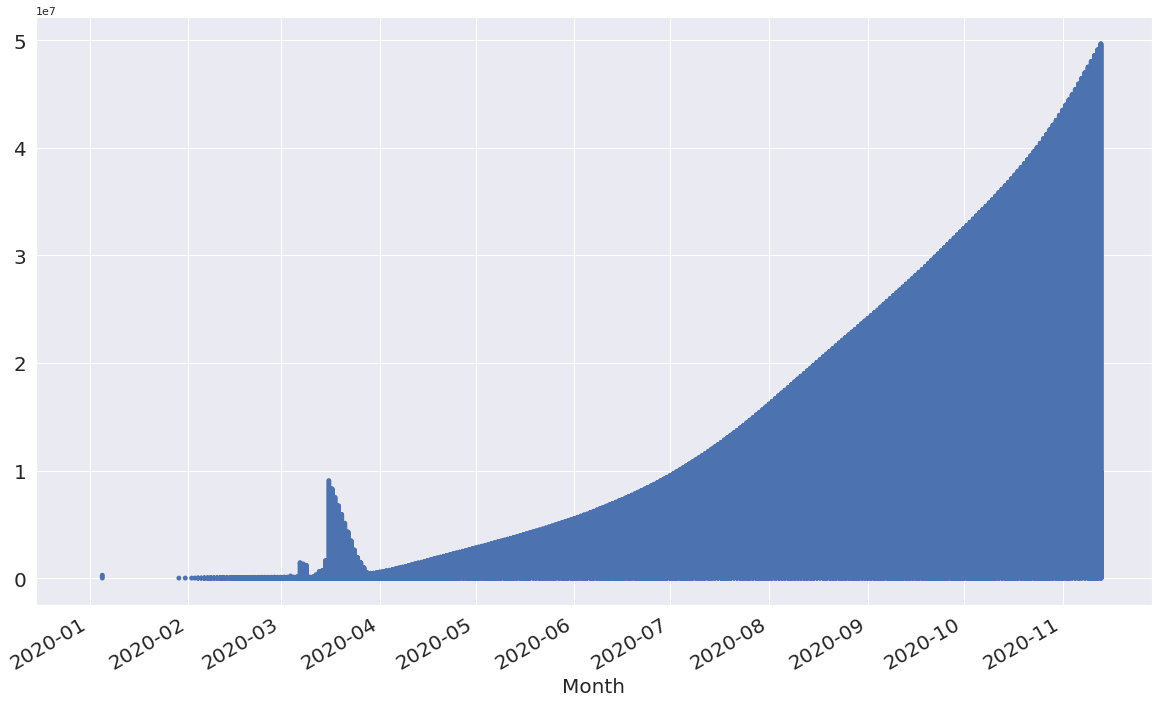

In [ ]:
total_cases=covid1.total_cases
total_cases.rolling(12).mean().plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

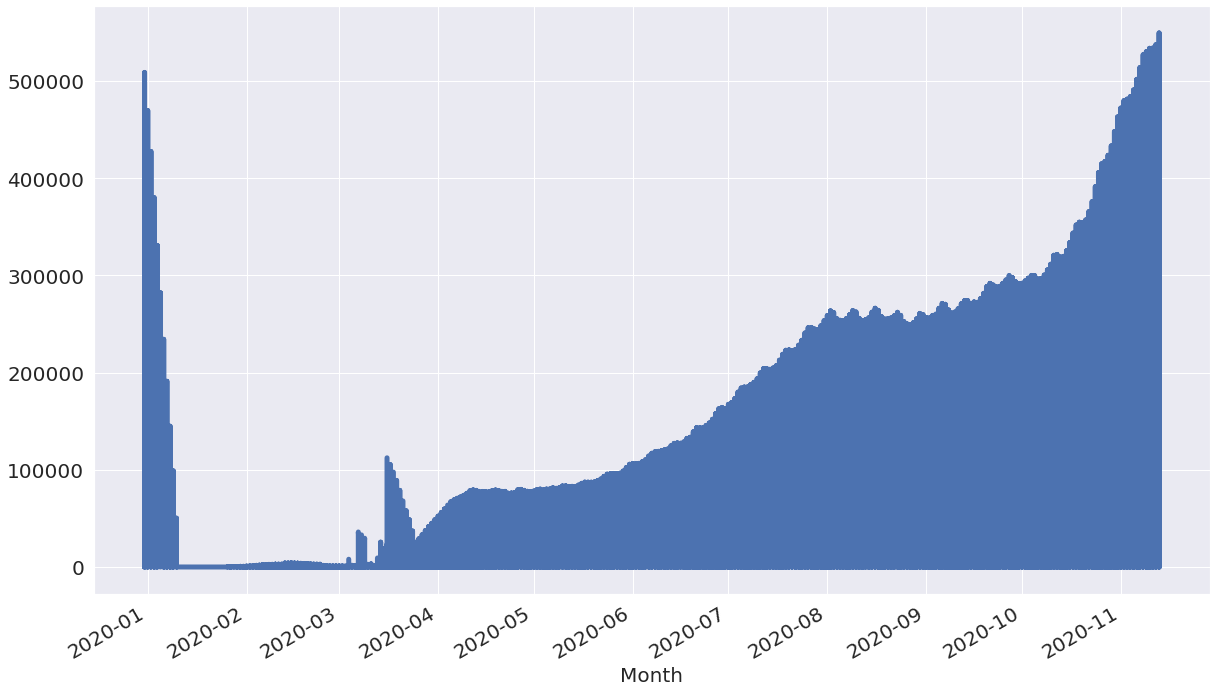

In [ ]:
new_cases=covid1.new_cases
new_cases.rolling(12).mean().plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

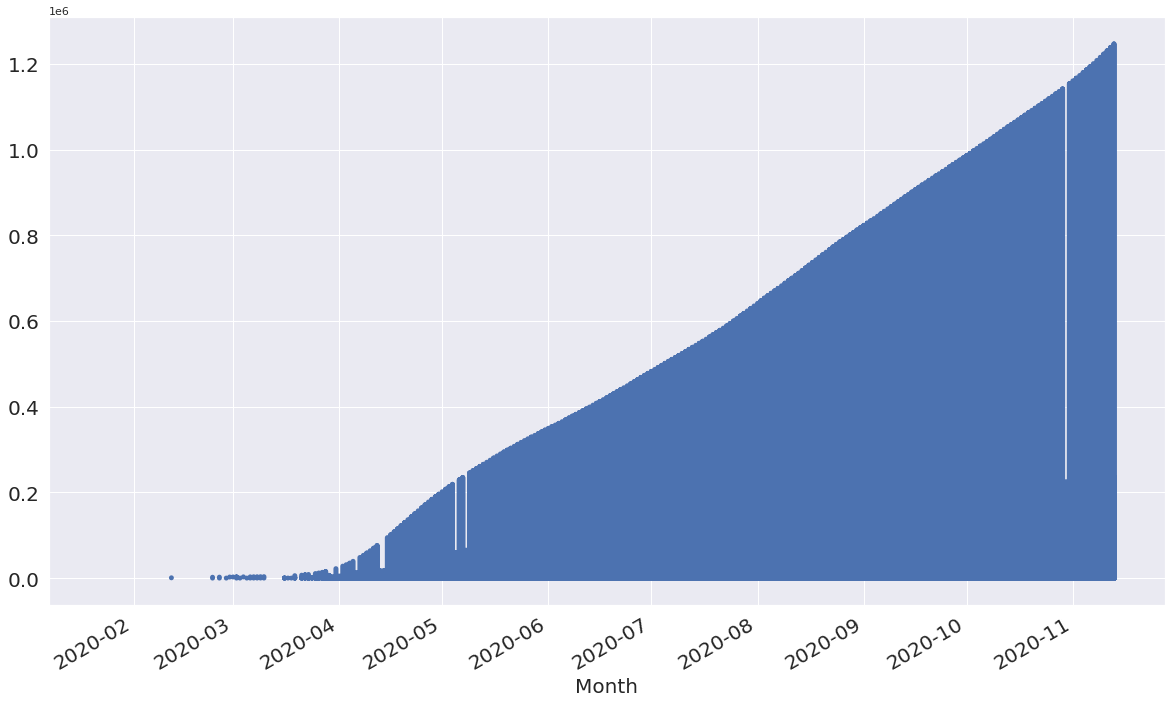

In [ ]:
total_deaths=covid1.total_deaths
total_deaths.rolling(12).mean().plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

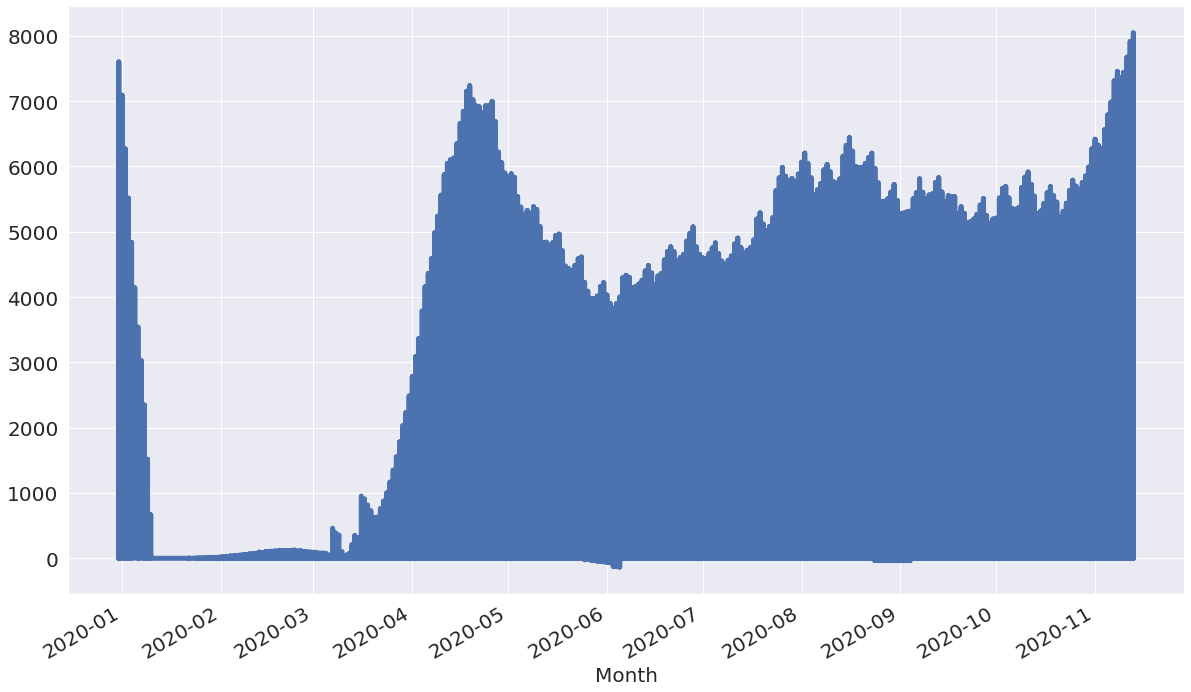

In [ ]:
new_deaths=covid1.new_deaths
new_deaths.rolling(12).mean().plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

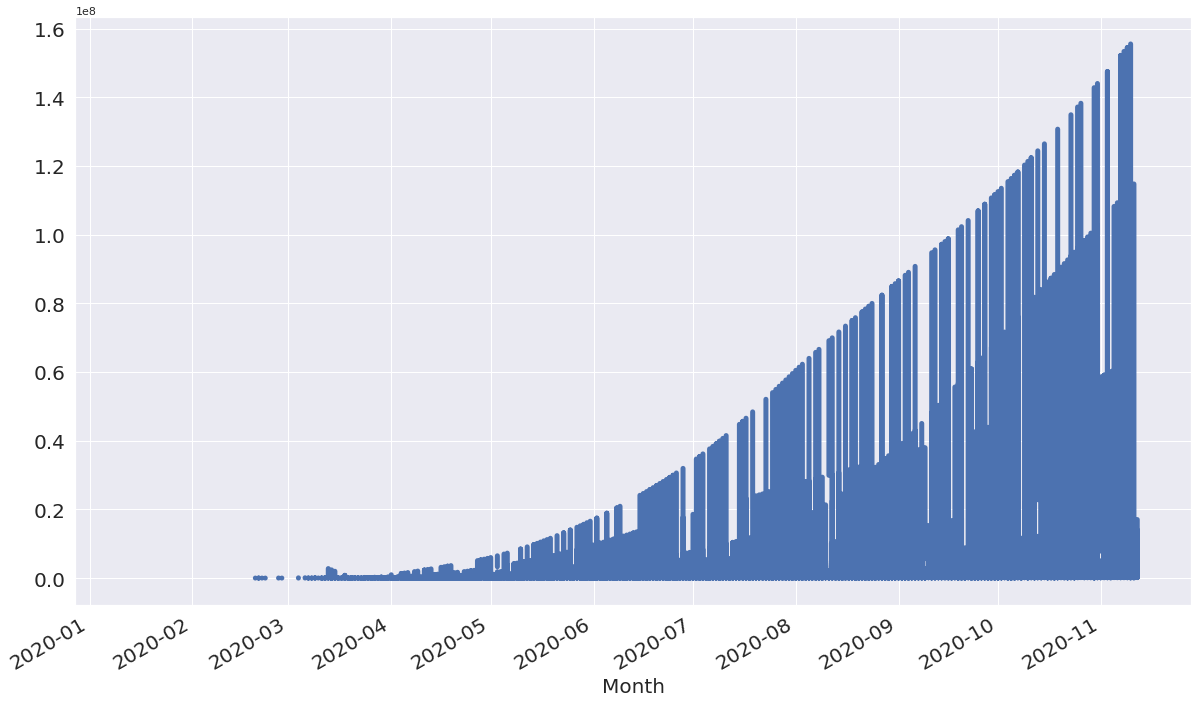

In [ ]:
total_tests=covid1.total_tests
total_tests.rolling(12).mean().plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

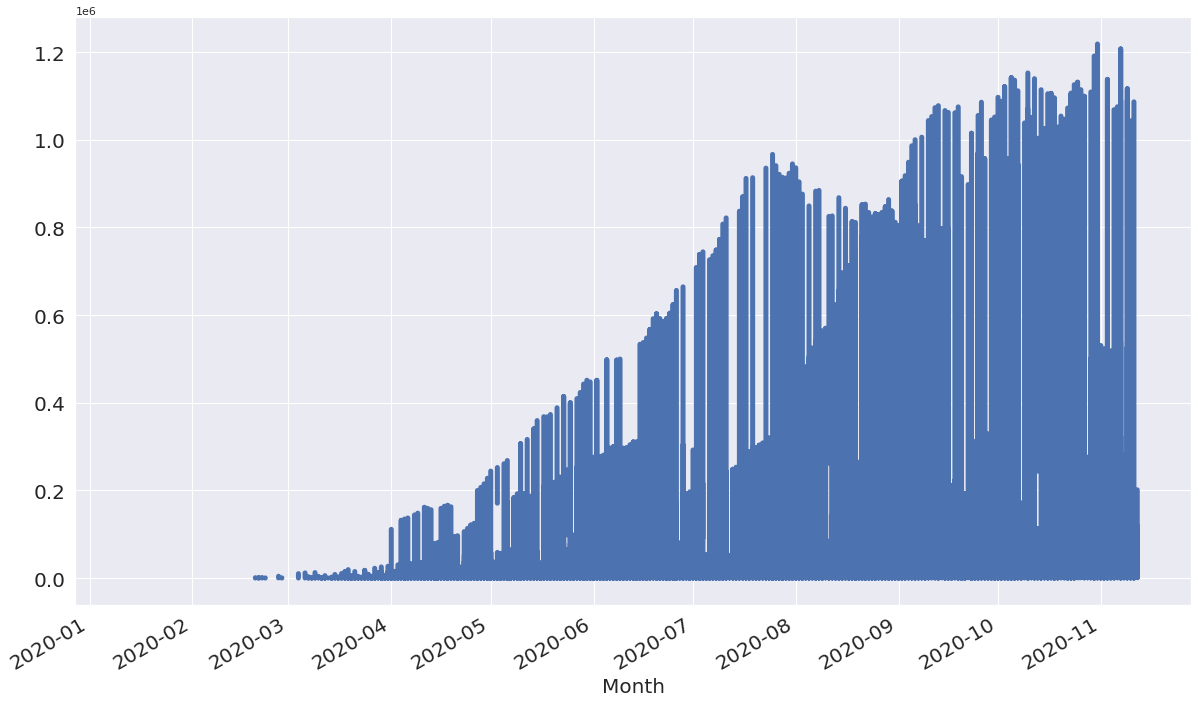

In [ ]:
new_tests=covid1.new_tests
new_tests.rolling(12).mean().plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize = 20)

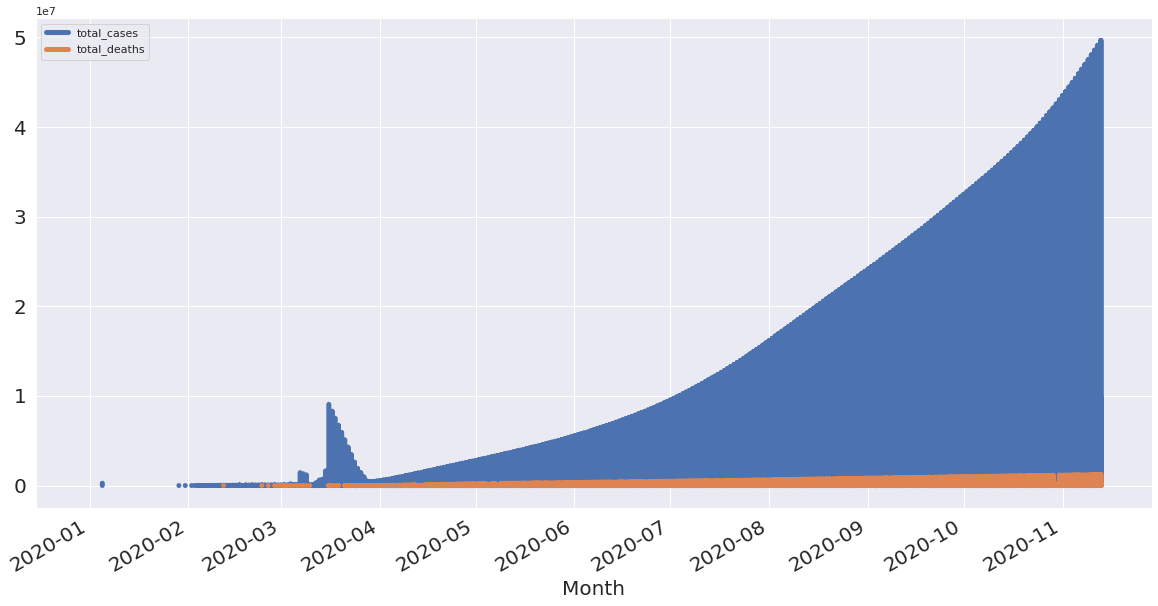

In [ ]:

df_rm = pd.concat([total_cases.rolling(12).mean(), total_deaths.rolling(12).mean()], axis = 1)
df_rm.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

##Seasonal Patterns in Time Series Data

Text(0.5, 0, 'Month')

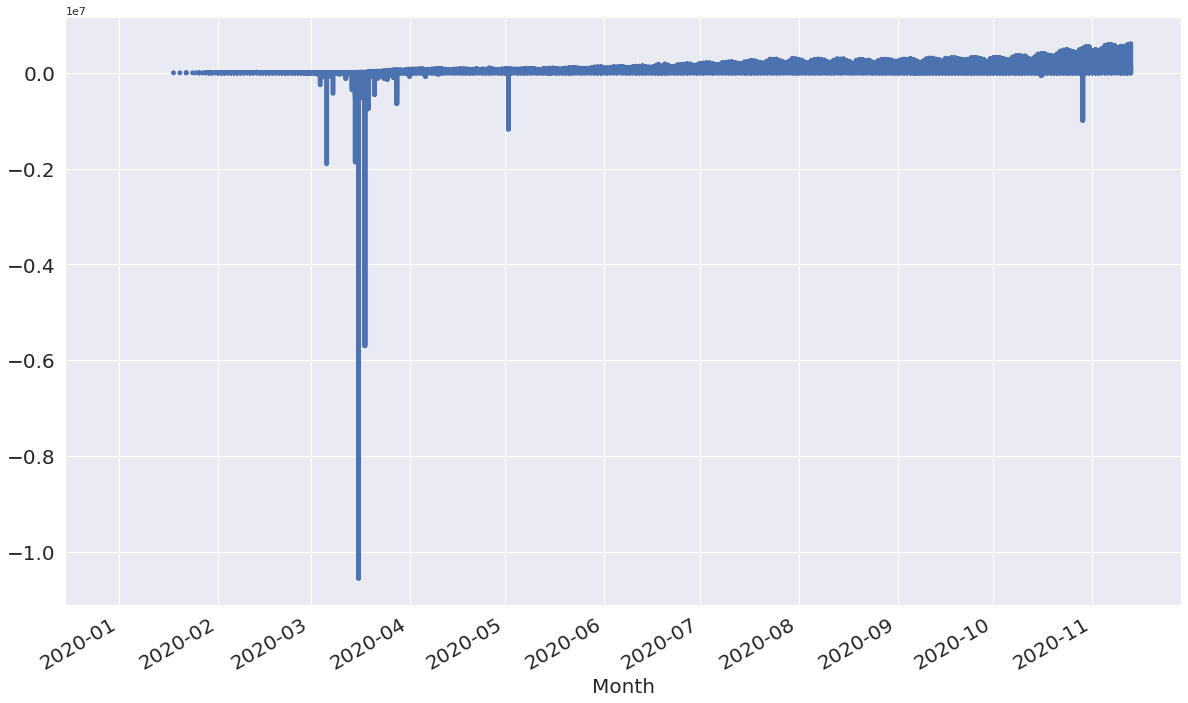

In [ ]:
total_cases.diff().plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize = 20)